In [1]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

In [2]:
from qiskit import assemble
from qiskit_ibm_provider import IBMProvider
#from qiskit import IBMQ
from qiskit import execute
from qiskit.tools import job_monitor

In [3]:
IBMProvider.save_account('7dc4818e71875543fa83807f90f5c16ba8e2bd1e900fd1194592de5ebf1f5e48d85fe6299cdf8ec1e2eb079ee7bea62e9aad442108c56150ad594f84de3c59a8', overwrite=True)
IBMProvider()

<IBMProvider>

In [4]:
provider = IBMProvider(instance="ibm-q-ncsu/nc-state/vlsi-cad-tools")
backend = provider.get_backend('ibm_cairo')

In [11]:
lengths_2_qubit = np.arange(1, 10, 3)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (0, 1,2,3,4,5)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB([qubit], lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ],
    flatten_results=True,
)
expdata_1q = single_exps.run(backend).block_for_results()

Gate error ratio: {}


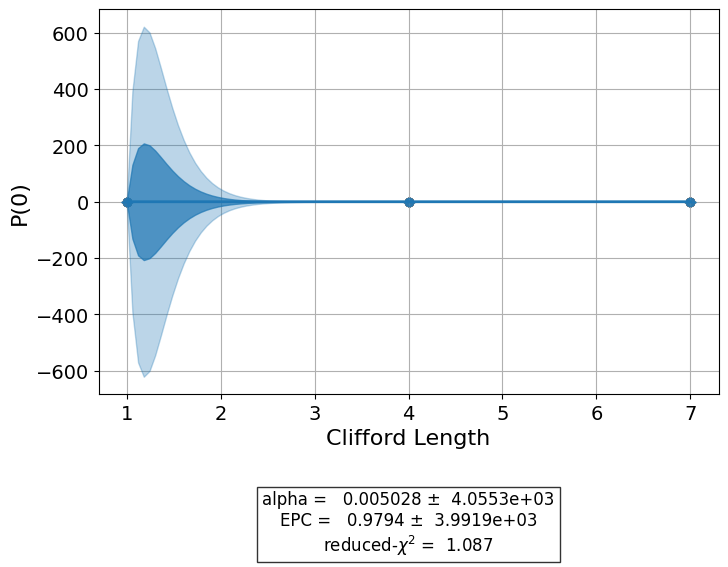

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 22
 - degree of freedom: 0
 - chi-square: 1.0873577982798268
 - reduced chi-square: 1.0873577982798268
 - Akaike info crit.: 2.9554152796808215
 - Bayesian info crit.: 0.25125214568515064
 - init params:
  * a = 0.984375
  * alpha = 0.0027081697246614782
  * b = 0.015625
 - fit params:
  * a = 0.7359095107802325 ± 593584.0207759937
  * alpha = 0.005027624199641829 ± 4055.2781323744184
  * b = 0.014590885121024955 ± 0.0006881168882747054
 - correlations:
  * (a, alpha) = -0.9999999999998413
  * (alpha, b) = -0.6242553382595688
  * (a, b) = 0.6242551975366443
- quality: good
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']
- verified: False
AnalysisResult
- name: alpha
- value: (0+/-4)e+03
- χ²: 1.0873577982798268
- quality: good
- device_components: ['Q0', 'Q1', 'Q2

In [12]:
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend, shots = 2000).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

In [ ]:
# Run an RB experiment on qubits 1, 2
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

In [ ]:
exp_2q.circuits()[29].decompose().depth()

In [ ]:
exp_2q.circuits()[0].draw('mpl')